# Import data simply and store in a list of list

In [1]:
classes = {1: "Forests",
          2: "Open Forests",
          3: "Bare slopes",
          4: "Agriculture",
          5: "Sandy Region",
          6: "Water",
          7: "Ice cover",
          8: "Settlement"}

In [2]:
with open("use_files/landsatDataNP_import.csv", "r") as fl:
    data = fl.read()

In [3]:
x_rough_train = [row.split(",")[1: -1] for row in data.split("\n")[1: -1]]
y_train = [row.split(",")[-1] for row in data.split("\n")[1: -1]]

In [4]:
max_vals = [20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0, 1.0, 1.0, 1.0, 1.0, 10000.0]

In [5]:
x_train = []
for i in x_rough_train:
    tmp = []
    for x, mx in zip(i, max_vals):
        tmp.append(float(x)/mx)
    x_train.append(tmp)
        

In [6]:
import numpy as np
X_train = np.array(x_train[:70000])
Y_train = np.array(y_train[:70000])

X_test = np.array(x_train[70000:])
Y_test = np.array(y_train[70000:])

NameError: name 'np' is not defined

# Heh Rather import in a pd dataset

In [ ]:
#https://www.bmc.com/blogs/keras-neural-network-classification/

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("use_files/landsatDataNP_import.csv")

In [ ]:
data.describe()

,B1,B2,B3,B4,B5,B6,B7,NDWI,NDVI,MNDWI,NDBI,elevation,LULC
count,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000,99638.000000
mean,1230.657149,1323.015315,1454.452061,2276.982788,1814.925285,2892.303142,1242.124024,0.115896,0.390045,-0.316372,-0.115896,2101.068056,2.951474
std,3018.790084,2707.795009,2967.112529,1596.329793,918.128098,104.860802,801.054760,0.229613,0.260727,0.344921,0.229613,1755.892012,1.952101
min,35.000000,37.000000,21.500000,51.000000,-4.000000,2365.000000,-35.000000,-0.502959,-0.655013,-0.729141,-1.035714,60.000000,1.000000
25%,373.500000,497.000000,460.500000,1674.000000,1151.000000,2844.500000,606.000000,-0.042914,0.244975,-0.510093,-0.233536,596.000000,1.000000
50%,553.000000,740.000000,807.000000,2147.000000,1779.000000,2918.000000,1104.750000,0.085133,0.425170,-0.425976,-0.085133,1572.000000,3.000000
75%,829.500000,1065.000000,1231.000000,2507.000000,2423.000000,2965.000000,1743.000000,0.233536,0.591132,-0.303799,0.042914,3451.000000,4.000000
max,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,3210.000000,13983.500000,1.035714,0.907505,1.016162,0.502959,8036.000000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99638 entries, 0 to 99637
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         99638 non-null  object 
 1   B1         99638 non-null  float64
 2   B2         99638 non-null  float64
 3   B3         99638 non-null  float64
 4   B4         99638 non-null  float64
 5   B5         99638 non-null  float64
 6   B6         99638 non-null  float64
 7   B7         99638 non-null  float64
 8   NDWI       99638 non-null  float64
 9   NDVI       99638 non-null  float64
 10  MNDWI      99638 non-null  float64
 11  NDBI       99638 non-null  float64
 12  elevation  99638 non-null  int64  
 13  LULC       99638 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 10.6+ MB


0.43532809957283153

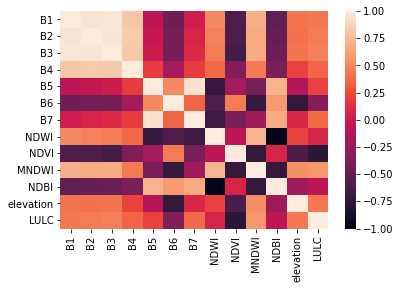

In [ ]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

data["B1"].corr(data["LULC"])

In [ ]:
labels=data['LULC']
features = data.iloc[:,1:12]

X = features
y = np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
66757/66757 [==============================] - 92s 1ms/step - loss: nan - accuracy: 0.0022
Epoch 2/4
66757/66757 [==============================] - 73s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/4
66757/66757 [==============================] - 71s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/4
66757/66757 [==============================] - 71s 1ms/step - loss: nan - accuracy: 0.0000e+00


In [ ]:
for layer in model.layers:
    weights = layer.get_weights()

In [ ]:
y_pred = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)